# Brain MRI Tumor Segmentation  
## Otsu vs Sauvola Thresholding

### Objective
To segment tumor regions in brain MRI images using:
- Global Otsu Thresholding
- Adaptive Sauvola Thresholding

### Evaluation Metrics
- Dice Coefficient
- Jaccard Index

### Dataset
Kaggle – Brain MRI Tumor Segmentation Dataset


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_sauvola
from tqdm import tqdm
import pandas as pd


In [2]:
IMAGE_DIR = "dataset/images"
MASK_DIR = "dataset/masks"

image_files = sorted(os.listdir(IMAGE_DIR))
mask_files = sorted(os.listdir(MASK_DIR))

print("Total images:", len(image_files))


Total images: 3064


Image Loader

In [3]:
def load_image(path, size=(256,256)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    return img


Thresholding Methods

In [ ]:
def otsu_segmentation(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    t = threshold_otsu(img)
    return (img > t).astype(np.uint8)

def sauvola_segmentation(img, window_size=25):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    t = threshold_sauvola(img, window_size=window_size)
    return (img > t).astype(np.uint8)


Evaluation Metrics

In [5]:
def dice_score(pred, gt):
    pred = pred.astype(bool)
    gt = gt.astype(bool)
    return 2 * np.sum(pred & gt) / (np.sum(pred) + np.sum(gt) + 1e-8)

def jaccard_score(pred, gt):
    pred = pred.astype(bool)
    gt = gt.astype(bool)
    return np.sum(pred & gt) / (np.sum(pred | gt) + 1e-8)


Visual Comparison

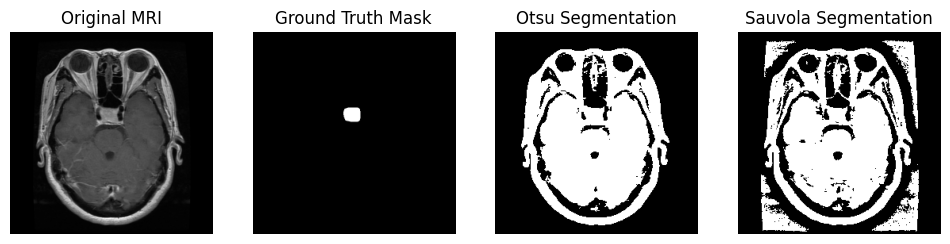

In [6]:
idx = 10  # change index to view different images

img = load_image(os.path.join(IMAGE_DIR, image_files[idx]))
mask = load_image(os.path.join(MASK_DIR, mask_files[idx]))

otsu = otsu_segmentation(img)
sauvola = sauvola_segmentation(img)

plt.figure(figsize=(12,8))

plt.subplot(1,4,1)
plt.title("Original MRI")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Ground Truth Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Otsu Segmentation")
plt.imshow(otsu, cmap="gray")
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Sauvola Segmentation")
plt.imshow(sauvola, cmap="gray")
plt.axis("off")

plt.show()


Evaluation on Full Dataset

In [7]:
results = []

for img_file, mask_file in tqdm(zip(image_files, mask_files), total=len(image_files)):
    img = load_image(os.path.join(IMAGE_DIR, img_file))
    mask = load_image(os.path.join(MASK_DIR, mask_file)) > 0

    otsu = otsu_segmentation(img)
    sauvola = sauvola_segmentation(img)

    results.append({
        "Dice_Otsu": dice_score(otsu, mask),
        "Dice_Sauvola": dice_score(sauvola, mask),
        "Jaccard_Otsu": jaccard_score(otsu, mask),
        "Jaccard_Sauvola": jaccard_score(sauvola, mask),
    })

df = pd.DataFrame(results)
df.head()


100%|██████████| 3064/3064 [01:39<00:00, 30.73it/s]


,Dice_Otsu,Dice_Sauvola,Jaccard_Otsu,Jaccard_Sauvola
0,0.107122,0.072382,0.056592,0.037550
1,0.088418,0.053311,0.046254,0.027385
2,0.053967,0.041899,0.027732,0.021398
3,0.028900,0.019743,0.014662,0.009970
4,0.031668,0.021957,0.016089,0.011100


Final Comparison Results

In [8]:
df.mean()


Dice_Otsu          0.073035
Dice_Sauvola       0.048751
Jaccard_Otsu       0.038916
Jaccard_Sauvola    0.025398
dtype: float64